<a href="https://colab.research.google.com/github/Alexin12/Airline-Customer-Satisfaction-Project/blob/master/churn_project_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Customer Churn Prediction

> Indented block



In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

**Things need to know**
* 对于0基础的同学，以了解为主
* 不需要可以从0把code写出来
* 这部分code与算法课程code的思维不一样
* 需要下课自己去跑一下code，尽量去理解
* 工具终归是辅助我们的，先尽力学会一个
* 逐步掌握python code debug能力

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)

# Part 0: Setup Google Drive Environment / Data Collection
check this [link](https://colab.research.google.com/notebooks/io.ipynb) for more info

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# the same way we get id from last class
# https://drive.google.com/file/d/1szdCZ98EK59cfJ4jG03g1HOv_OhC1oyN/view?usp=sharing
# https://drive.google.com/file/d/1rZ_JgBmd_HQXwiij8Me0fjZhS3KCYI_T/view?usp=sharing
id = "1rZ_JgBmd_HQXwiij8Me0fjZhS3KCYI_T"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv')

#1.这个项目是干什么----预测 customer churn
#2.目的是什么--知道哪些customer可能churn 然后给他们一些promotion /知道customer 可能churn的feature是什么
#3.数据从哪里来？ customer register 


In [ ]:
import pandas as pd
df = pd.read_csv('bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv('bank_churn.csv')

In [ ]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# check the unique values for each column
churn_df.nunique()
#customer row number 什么时候有用？
#如果包含 账户注册的时间的信息的时候 
#surname 什么时候会有用呢？ 不同国家的surname 文化可能产生影响，但需要更多的background infor去支持这个猜想
#balance 有3000个左右是一样的， 说明很data是0

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Get target variable
y = churn_df['Exited']

### Part 1.2:  Understand the features

In [ ]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#numeric data exploration

In [ ]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()
##这里estimated salary 是否是outlier 要看情况 --小时薪资？还是月还是啥 要看背景条件 
#11.58是outlier吗？  depends ，需要更多信息 比如 如果知道 所有州最低时薪 是12 那么 这就是一个outlier
#要有自己的rational 什么时候认为其是outlier 什么时候不是




,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
# check the feature distribution
# pandas.DataFrame.describe()
# boxplot, distplot, countplot
import matplotlib.pyplot as plt
import seaborn as sns

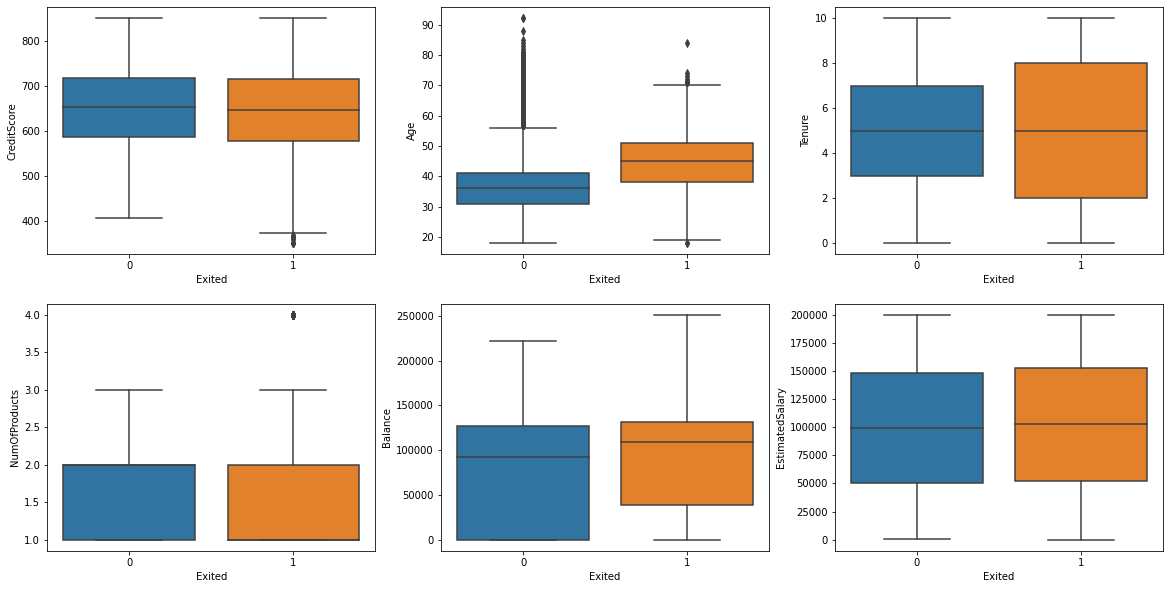

In [ ]:
# boxplot for numerical feature

# 下线是 lower bound ----25%的分位数 ——1.5quater range
#upper bound 75%+ 1.5 quarter range
figure,axss = plt.subplots(2,3, figsize=[20,10])##把图像都放在一起   figure /_ 和 axss是 返回值 图像或者数组 先进行设置
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])#churn 不churn 和score好像没啥关系
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])#岁数大的容易churn--business1 insight 可能是因为退休了 去世了？ 建模角度，年龄这个feature 是有用的
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])#时间用的短 或者长的人 都容易churn-----median都比较高
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])#会churn的顾客balance 高，，balance较低的人 更不容易chrun 可能是因为他们并不care这个账户
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

#boxplot 在lower bound 和 higher bound 之外的点数学意义上的outlier


#不能从这个图上 觉得这个feature不相关就把其删除
#因为它可能与其他变量组合可能会对y有影响



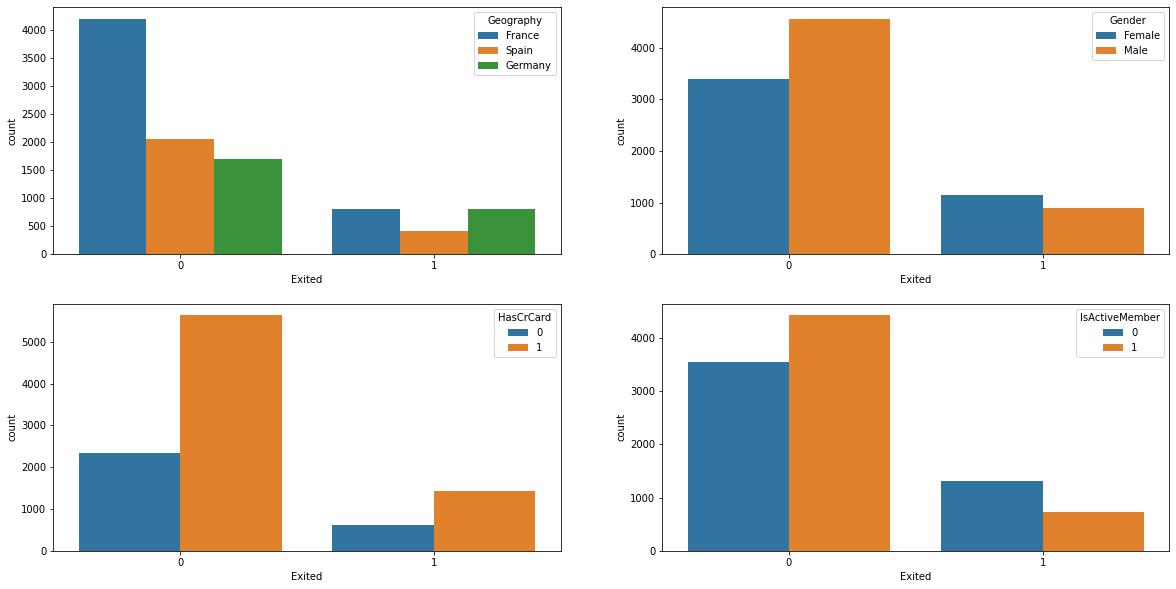

In [ ]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])##法国用户比较多 gemany的用户churn的多，因为不churn的人多， chunr的人三国相比比例大其比例较高 ---any insight？
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])#female churn的多 所以可以假设 female更容易关账户----如果要验证这些假设 则需要去收集user research 去收集他们真正churn的原因 或有domain knowledge
#去做假设检验 去验证是否符合猜想--比如说 认为 female 比较持家 所以不需要这么多账户 所以churn了 
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])###非活跃会员churn的多


##通过 data exploration 可以得出两点
1.哪些自变量可能与Y有关系---性别 地域国家等

2.产生一些假设 insight ---年龄大了 不用账户了 

# Part 2: Feature Preprocessing--feature enginering

In [ ]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
cat_cols = X.columns[X.dtypes == 'object']# 把text的 categorical的 feature拿出来
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
X.nunique()##为什么要将 activemember 和 hascard归类成 numerical？


CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [ ]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

Split dataset

In [ ]:
# Splite data into training and testing
#先分 再处理 否则 处理的时候 会用到testing数据的信息


#分层抽样--使得tets和train 中 label 是0 和1 的比例近似
#否则可能tets里面只有 0 或者很少的1 
# 100 -> 75:y=1, 25:y=0
# training(80): 60 y=1; 20 y=0 
# testing(20):  15 y=1; 5 y=0

from sklearn import model_selection

# Reserve 25% for testing
# stratify example:
# 100 -> y: 80 '0', 20 '1' -> 4:1
# 80% training 64: '0', 16:'1' -> 4:1
# 20% testing  16:'0', 4: '1' -> 4:1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1) #stratified sampling
#random state--如何分数据 哪些数据是test 哪些是train就固定了

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


* 10000 -> 8000 '0' + 2000 '1'

* 25% test 75% training 
---
without stratified sampling:
• extreme case:
---
1. testing: 2000 '1' + 500 '0'
2. training: 7500 '0'
---
with stratified sampling:
1. testing: 2000 '0' + 500 '1'
2. training: 6000 '0' + 1500 '1'


Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](http://contrib.scikit-learn.org/category_encoders/).

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


In [ ]:
# >>> enc = OneHotEncoder(handle_unknown='ignore')
# >>> X = [['Male', 1], ['Female', 3], ['Female', 2]]
# >>> enc.fit(X)
# OneHotEncoder(handle_unknown='ignore')
# >>> enc.categories_
# [array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
# >>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
# array([[1., 0., 1., 0., 0.],
#        [0., 1., 0., 0., 0.]])
# >>> enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
# array([['Male', 1],
#        [None, 2]], dtype=object)
# >>> enc.get_feature_names_out(['gender', 'group'])
# array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'], ...)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')#如果在 train set里没见过的类别 ---那么在处理test set的时候直接ignore --称为NOne eg A B C  tets-D --》NOne
pp=[['Male', 1], ['Female', 3], ['Female', 2]]###两个 feature
pp=pd.DataFrame(pp)

In [ ]:
pp=pp.rename(columns={0:'gender',1:'group'})

In [ ]:
pp

,gender,group
0,Male,1
1,Female,3
2,Female,2


In [ ]:
enc.fit(pp)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.transform(pp)


<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
enc.transform(pp).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [ ]:
after_encoding=pd.DataFrame(enc.transform(pp).toarray())

In [ ]:
after_encoding

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0


In [ ]:
enc.inverse_transform(after_encoding)## dataFrame 还是转换成array

array([['Male', 1],
       ['Female', 3],
       ['Female', 2]], dtype=object)

In [ ]:
after_array=enc.transform(pp).toarray()
after_array

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [ ]:
enc.inverse_transform(after_array)

array([['Male', 1],
       ['Female', 3],
       ['Female', 2]], dtype=object)

In [ ]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])##不是male 也不是 female enc不能识别--上面设置的参数是ignore 所以 返回NoNE

array([['Male', 1],
       [None, 2]], dtype=object)

In [ ]:
enc.get_feature_names_out(['gender', 'group'])###enc 在这里相当于一个已经识别了数据的工具 所以直接能够转换这两个名字

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

In [ ]:
pp

,gender,group
0,Male,1
1,Female,3
2,Female,2


In [ ]:
pd.get_dummies(pp,prefix=['group'])

,group,group_Female,group_Male
0,1,0,1
1,3,1,0
2,2,1,0


In [ ]:
pd.get_dummies(pp,columns=['gender','group'])##这里要用columns 而不要用prefix！！！！！！！！！！！！！！！！！！

,gender_Female,gender_Male,group_1,group_2,group_3
0,0,1,1,0,0
1,1,0,0,0,1
2,1,0,0,1,0


In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
             'C': [1, 2, 3]})


In [ ]:
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [ ]:
pd.get_dummies(df, columns=['A', 'B'])

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [ ]:
# One hot encoding
# another way: get_dummies
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])#让其看到 数据中有多少类别 ---只看到train set 

X_train = OneHotEncoding(X_train, enc_ohe, categories)##实现的其实就是encoding 的transform
X_test = OneHotEncoding(X_test, enc_ohe, categories)### test set 的处理 也是用到了 train set的信息 ---fit 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [ ]:
# pd.get_dummies(X,columns=['Geography']).head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


# Ordinal encoding

In [ ]:
### 如果有多个类别 则会变成 1 2 3 4 5 6 
#一般只有两个类别的话可以用 ordinal ，否则 feature 变成了数字 就有数学上的距离了 1 2 的距离 小于 1 3的距离
#但是 两个类别之间不应该有差距

from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


Standardize/Normalize Data--bring feature to same scale

In [ ]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use 【training data】 to train the standardscaler to get mean and std 
# apply mean and std to 【both】 training and testing data.

# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6,100] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

##w为了不产生 information leakage ，standardlization or normalization的时候 取到的参数 都是train set的
#比如 mean max min sd ，然后把这些参数应用在 tets set去normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])#计算train set的平均值 和sd
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [ ]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8088

### (Optional) Part 3.2: Use Grid Search to Find Optimal Hyperparameters
alternative: random search

In [ ]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV#帮助搜寻最优 hyper paramter的function

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### Part 3.2.1: Find Optimal Hyperparameters - LogisticRegression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)#solver 这个参数是代表logistics regression？

Grid_LR.fit(X_train, y_train)

#logistic regression para--solver---way to shoulian


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l2', 'l1')})

In [ ]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)
#接下来 C就应该 在1 的左右进行更细致的调参

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [ ]:
# best model
best_LR_model = Grid_LR.best_estimator_


In [ ]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
best_LR_model.score(X_test, y_test)

0.8092

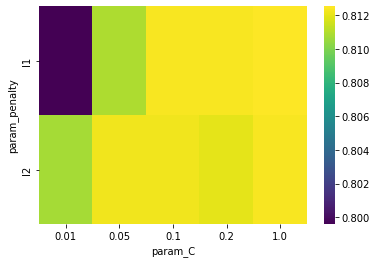

In [ ]:
LR_models = pd.DataFrame(Grid_LR.cv_results_)
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score')
            )
_ = sns.heatmap(res, cmap='viridis')

In [ ]:
LR_models.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021142,0.005646,0.005070,0.002411,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.818667,0.805333,0.806667,0.807333,0.816000,0.810800,0.005439,9
1,0.020396,0.001553,0.002881,0.000030,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.804667,0.792667,0.794000,0.800667,0.806000,0.799600,0.005426,10
2,0.018904,0.000941,0.002902,0.000022,0.05,l2,"{'C': 0.05, 'penalty': 'l2'}",0.820667,0.806667,0.806000,0.809333,0.818667,0.812267,0.006177,5
3,0.024476,0.004485,0.002955,0.000049,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.819333,0.806000,0.804000,0.808667,0.816667,0.810933,0.006016,8
4,0.019126,0.001130,0.003332,0.000753,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.820000,0.806667,0.806667,0.810000,0.818000,0.812267,0.005666,6


In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
...                            'two'],
...                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
...                    'baz': [1, 2, 3, 4, 5, 6],
...                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [ ]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [ ]:
df.pivot(index='baz',columns='foo',values='zoo')##pivot table excel

foo,one,two
baz,,
1,x,NaN
2,y,NaN
3,z,NaN
4,NaN,q
5,NaN,w
6,NaN,t


#### Part 3.2.2: Find Optimal Hyperparameters: KNN

In [ ]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
# best k
print_grid_search_metrics(Grid_KNN)
#往后调节的话 从 9 往大的调 10 11 12 

Best score: 0.8433333333333334
Best parameters set:
n_neighbors:9


In [ ]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
##这里为什么就直接建模了？？？？？？？

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [ ]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8672000000000001
Best parameters set:
max_depth:10
n_estimators:80


In [ ]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [ ]:
best_RF_model

RandomForestClassifier(max_depth=10, n_estimators=80)

#以上 best score 默认都是 accuracy



####Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 很少的negative被预测为postive


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn) 
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.---很少的postive 被预测为negative

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)# 加0.0 是为了提高精度
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8612
precision is: 0.8045112781954887
recall is: 0.4204322200392927

Logistic Regression
Accuracy is: 0.8092
precision is: 0.5963855421686747
recall is: 0.1944990176817289

K nearest neighbor
Accuracy is: 0.8428
precision is: 0.7283464566929134
recall is: 0.36345776031434185



#基本上rf 永远比 logistics 更好
#只要数据量足够

### Part 3.4: Model Evaluation - ROC & AUC--不需要 thereshold 

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_prob() function 

#### Part 3.4.1: ROC of RF Model 
##上面运用confusion matrix的方法 是假定 threshold是0.5的情况下 
##如果threshold还没确定的情况下 也可以用 ROC AUC去评估模型的好坏

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]#告诉 原生的概率 而不是0 1 的结果
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)##true postive rate 、 false postibe rate

In [ ]:
best_RF_model.predict_proba(X_test)#第一行列是 0 的概率 第二行是1 的概率

array([[0.75298749, 0.24701251],
       [0.92782132, 0.07217868],
       [0.7563466 , 0.2436534 ],
       ...,
       [0.84989892, 0.15010108],
       [0.91623057, 0.08376943],
       [0.88684186, 0.11315814]])

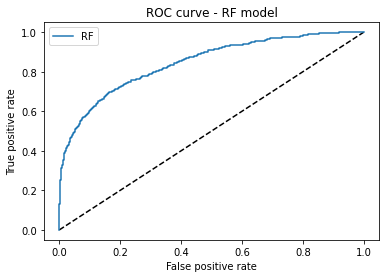

In [ ]:
# ROC curve of Random Forest result
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)
#实际工作并不需要 去画图
#只要用auc fuction 计算面积就好了

0.8460843935233107

#### Part 3.4.1: ROC of LR Model

In [ ]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

In [ ]:
best_LR_model.predict_proba(X_test)

array([[0.82436017, 0.17563983],
       [0.93171279, 0.06828721],
       [0.85520201, 0.14479799],
       ...,
       [0.71449931, 0.28550069],
       [0.89278511, 0.10721489],
       [0.85560293, 0.14439707]])

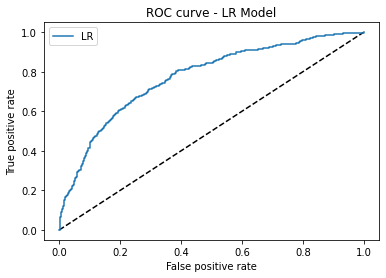

In [ ]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

#logistic regression 的auc 更平坦


In [ ]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7722087310381984

#model 的performance 要调到什么程度呢？
看需求 比如 project 要求 80%的accuracy 就能保证项目的 break even
那么就不需要 再纠结在一直improve accuracy auc了

#选什么model？
不同的情况下 不同的模型

如果performance至上的project 那么RF

但如果考虑到 计算资源 logistics 就很好

#面试的 mindset
## 要去解决问题 而不是一味地提高model performance
##去注重流程


# Part 4: Model Extra Functionality---不属于标准modeling 流程 这里只是 demo之前学的概念

### Part 4.1:  Logistic Regression Model

The corelated features that we are interested in

In [ ]:
X_with_corr = X.copy()

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography'])
X_with_corr['Gender'] = enc_oe.transform(X_with_corr[['Gender']])
X_with_corr['SalaryInRMB'] = X_with_corr['EstimatedSalary'] * 6.4
X_with_corr.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,648632.832
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,720272.512
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,729162.048
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,600490.432
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,506138.240


In [ ]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7307
IsActiveMember : -0.5046
Geography_Germany : 0.3121
Gender : -0.2409
Balance : 0.151
CreditScore : -0.0457
NumOfProducts : -0.0439
Tenure : -0.0271
EstimatedSalary : 0.0087
Geography_France : -0.0043
HasCrCard : -0.0022
SalaryInRMB : 0.0005
Geography_Spain : 0.0


In [ ]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [ ]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2399
EstimatedSalary : 0.1456
CreditScore : 0.1453
Balance : 0.1412
NumOfProducts : 0.13
Tenure : 0.0814
IsActiveMember : 0.0396
Geography_Germany : 0.0212
HasCrCard : 0.0185
Gender : 0.0183
